# Part 1: Using Naïve Bayes to work with Text Data (50 points)

## 1.Representing text as data [10 pts]

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']
import pandas as pd

In [2]:
#Learn the 'vocabulary' of the training data
vect = CountVectorizer()
vect.fit(simple_train)
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [3]:
#Transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [4]:
#Print the sparse matrix.
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [5]:
#Convert the sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [6]:
#Examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [7]:
#Transform testing data into a document-term matrix
simple_test = ["please don't call me"]
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [8]:
#Examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


## 2.Analyzing SMS data with Naïve Bayes [40 pts]

In [9]:
#Read into the data from the file “sms.tsv”; give the names of columns as ['label', 'message']; and print the first 10 samples to view part of the data.


col_names = ['label', 'message']


In [10]:
#print the first 10 samples to view part of the data.
sms = pd.read_table('sms.tsv', sep='\t', header=None, names=col_names)
#print(sms.shape)
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [11]:
#Convert label to a numeric variable.
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
sms['label'] = sms.label.map({'ham':0, 'spam':1})
sms.head(10)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [13]:
'''
Then define the X and y
Split into training and testing sets by train_test_split(); and print the shape of training set and test set.
'''
X = sms.message
y = sms.label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4179,)
(1393,)


In [14]:
#Use the two Naïve Bayes models (GaussianNB and MultinomialNB) to finish the following requirements, respectively:

from sklearn import metrics

In [15]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train).toarray()
X_test_dtm = vect.transform(X_test).toarray()

In [16]:
#GaussianNB 

In [17]:
# calculate accuracy of predictions
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_dtm, y_train)
y_pred_1 = gnb.predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_1))

0.8994974874371859


In [18]:
#give the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_1))

[[1079  129]
 [  11  174]]


In [19]:
#print message text for the false positives
X_test[y_test < y_pred_1]

3465                                             My phone
1242    I want to show you the world, princess :) how ...
3214                                       What's ur pin?
574                                Waiting for your call.
4487                                 have * good weekend.
                              ...                        
2285                              Velly good, yes please!
2155    Oh god i am happy to see your message after 3 ...
1925                                                   Ok
1988                     No calls..messages..missed calls
3207                                        At home also.
Name: message, Length: 129, dtype: object

In [20]:
#print message text for the false negatives
X_test[y_test > y_pred_1]

3530    Xmas & New Years Eve tickets are now on sale f...
1875    Would you like to see my XXX pics they are so ...
349     Fancy a shag? I do.Interested? sextextuk.com t...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
165     BangBabes Ur order is on the way. U SHOULD rec...
2821    INTERFLORA - It's not too late to order Inter...
191     Are you unique enough? Find out from 30th Augu...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [21]:
#MultinomialNB

In [22]:
# calculate accuracy of predictions
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
y_pred_2 = nb.fit(X_train_dtm, y_train).predict(X_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_2))

0.9885139985642498


In [23]:
#give the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_2))

[[1203    5]
 [  11  174]]


In [24]:
#print message text for the false positives
X_test[y_test < y_pred_2]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [25]:
#print message text for the false negatives
X_test[y_test > y_pred_2]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

# Part 2: Linear Regression (50 points)

In [26]:
'''
The Data: import load_boston from sklearn.datasets 

The Goal: Using Linear Regression on the dataset

The Tasks:

1.  First, read into the data and process it in the right format for using machine learning.

2. Then, use the DataFrame corr() method to show what features are correlated with each other.

3. The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.

4. Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure:

5. According to your output, answer the following questions:
        In the above plot, what features are highly correlated? Which features are highly uncorrelated?

6. Next, building the Linear Regression Model

First, please split the data into two datasets as training and test sets. According to the four steps taught in the classes, please train the model by linear regression and predict.

Please print the coefficient for your model from the above results. It requires you print each element of the coefficient and the corresponding the feature names.

Finally, to gain an understanding of how your model is performing, please score the model against 2 metrics: R squared and mean squared error. Write the lines of code to get your output; and answer the questions:
    (a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?
    (b) What you think could improve the model?
'''

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [28]:
#1.  First, read into the data and process it in the right format for using machine learning.
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
data.corr(method ='pearson').round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [30]:
#2. Then, use the DataFrame corr() method to show what features are correlated with each other.

<AxesSubplot:>

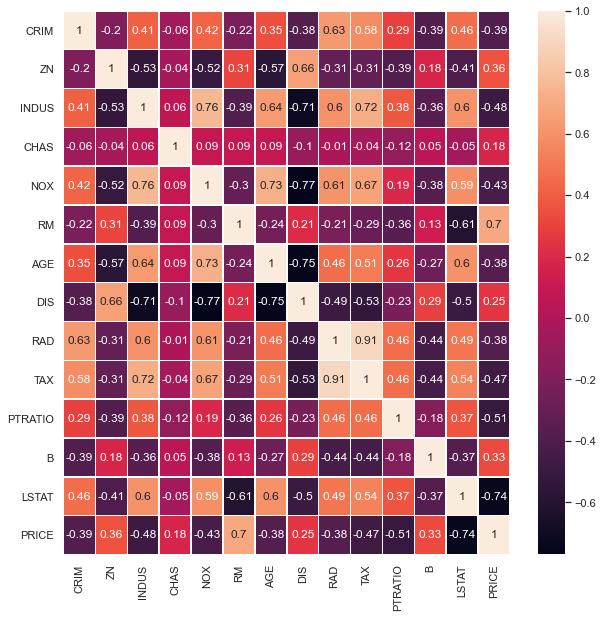

In [31]:
#3. The columns don't have any labels. Given the name of columns as ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']; then use the DataFrame corr() again.
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

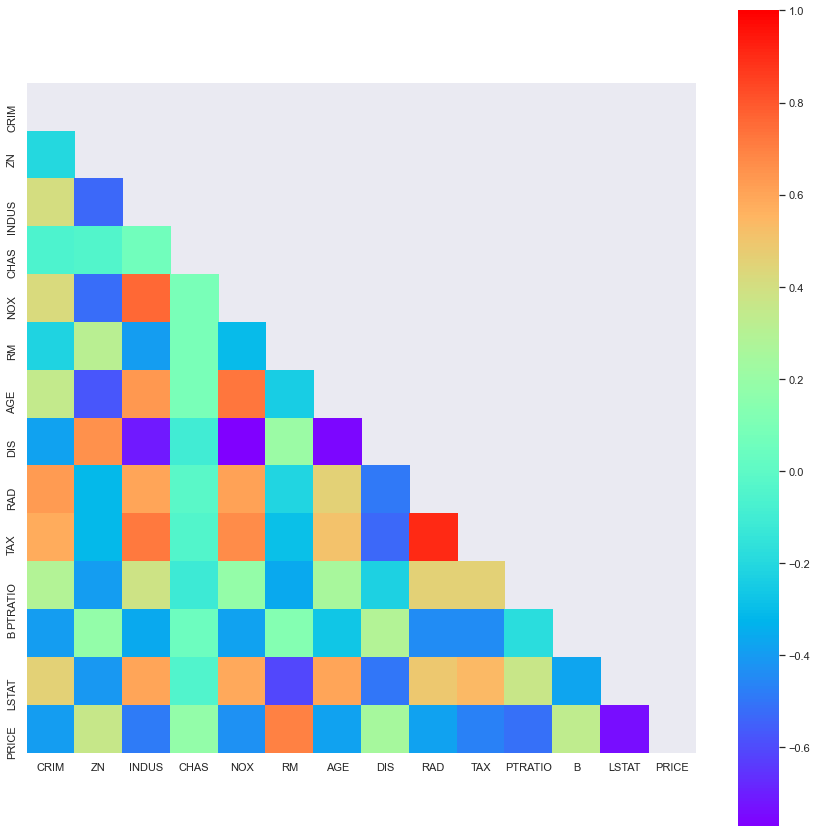

In [32]:
#4. Now, you have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot. Please write codes to plot correlations by color same as (similar with) the following figure:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix,cmap="rainbow",mask= np.triu(correlation_matrix),vmax=1,square=True)

In [33]:
#5. According to your output, answer the following questions:
#In the above plot, what features are highly correlated? Which features are highly uncorrelated?

#The correlation coefficient ranges from -1 to 1. 
print("Value close to 1 -> highly correlated ---------- TAX & RAD")
print("Value close to -1 -> highly uncorrelated ------- DIS & NOX")


Value close to 1 -> highly correlated ---------- TAX & RAD
Value close to -1 -> highly uncorrelated ------- DIS & NOX


##### ............. NEW DATA ............... 

In [34]:
X = data.drop('PRICE', axis = 1)
y = data.PRICE
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [35]:
pd.DataFrame(zip(X.columns,model.coef_),columns=['features','estimated coefficient'])

,features,estimated coefficient
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [37]:
#6 First, please split the data into two datasets as training and test sets. According to the four steps taught in the classes, please train the model by linear regression and predict.

linmodel = LinearRegression()
linmodel.fit(X_train, Y_train)
y_train_predict = linmodel.predict(X_train)
y_test_predict = linmodel.predict(X_test)

In [38]:
#Please print the coefficient for your model from the above results. It requires you print each element of the coefficient and the corresponding the feature names.

pd.DataFrame(zip(X.columns,linmodel.coef_),columns=['features','estimated coefficient'])

,features,estimated coefficient
0,CRIM,-0.154486
1,ZN,0.041395
2,INDUS,-0.025377
3,CHAS,0.786055
4,NOX,-12.936584
5,RM,4.039523
6,AGE,-0.010535
7,DIS,-1.334986
8,RAD,0.318273
9,TAX,-0.012643


In [39]:
# model evaluation for training data
print("training")
print('R2 score is %.2f'%r2_score(Y_train, y_train_predict))
print('Mean squared error: %.2f'% mean_squared_error(Y_train, y_train_predict))

training
R2 score is 0.76
Mean squared error: 19.07


In [40]:
# model evaluation for testing data
print("testing")
print('R2 score is %.2f'%r2_score(Y_test, y_test_predict))
print('Mean squared error: %.2f'% mean_squared_error(Y_test, y_test_predict))

testing
R2 score is 0.68
Mean squared error: 30.70


In [41]:
#("R-squared is a relative measure of fit")
#("So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation")

In [42]:
#("Mean square error (MSE) is used to determine the model's performance. The larger the number the larger the error.")

In [43]:
#(a) What do the metrics of R Squared and Mean Squared Error? What are the numbers telling you?
print("Since R2 score is close to 1 than 0, this shows moderate level of correlation.")
print("MSE value is not very large, so model's performance is good.")

Since R2 score is close to 1 than 0, this shows moderate level of correlation.
MSE value is not very large, so model's performance is good.


In [45]:
#(b) What you think could improve the model?
print("By choose the best regression model such that R2 value is more close to 1 and MSE is close to 0.")

print("By performing hyperparameter tuning and adding more attributes to the dataset we can improve the model.")


By choose the best regression model such that R2 value is more close to 1 and MSE is close to 0.
By performing hyperparameter tuning and adding more attributes to the dataset we can improve the model.


Graphing the relevant and not the irrelevant.
Consider transforming every variable in sight:
• Logarithms of all-positive variables (primarily because this leads to multiplicative models on the original scale, which often makes sense)
• Standardizing based on the scale or potential range of the data (so that coefficients can be more directly interpreted and scaled); an alternative is to present coefficients in scaled and unscaled forms
• Transforming before multilevel modeling (thus attempting to make coefficients more comparable, thus allowing more effective second-level regressions, which in turn improve partial pooling).
